In [1]:
#importing basic libraries
import numpy as np
import math
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Defining the sigmoid function

def sigmoid(a):
  return 1 / (1 + np.exp(-a))

In [3]:
#logistic regression class

class logistic_regg:
  def __init__(self, lr, n_iters):
    self.lr = lr
    self.n_iters = n_iters
    self.W = None
    self.B = None

  def train(self, X, Y):
    self.X = X
    self.Y = Y
    n_examples, n_features = X.shape
    self.Zw = np.zeros(n_features)
    self.Zb = np.zeros(1)
    self.W = np.random.random(n_features)
    self.B = np.random.random()
    dW = np.zeros(n_features)
    dB = 0

    for i in range (self.n_iters):
      # Calculating Activations
      Z = np.matmul(self.W, X.T) + self.B
      A = sigmoid(Z)
      # Calculating Derivatives
      dW = np.matmul(A - Y, X) / n_examples
      dB = np.mean(A - Y)
      # Updating weights and biases (Gradient Descent)
      self.W = self.W - self.lr * dW
      self.B = self.B - self.lr * dB
    self.Zw = self.W
    self.Zb[0] = self.B

  def predict(self, x, threshold):
    Z = np.matmul(self.W, x.T) + self.B
    A = sigmoid(Z)
    A[A >= threshold] = 1
    A[A <= threshold] = 0
    y_pred = A
    return y_pred
  
  def variable(self):
    return np.concatenate((self.Zw, self.Zb))

def score(y, y_pred):
  y_bool = (y == y_pred)
  corr = np.count_nonzero(y_bool)
  score = corr / len(y)
  return print(f'model got: {corr} / {len(y)} correct, which is: {score*100} % accuracy.')




In [4]:
dataset = pd.read_csv('./Data/Iris.csv')
print(dataset.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [5]:
#Removing one specie(for better visualization) and the column Id from the dataset

print(dataset['Species'].unique())
label = (dataset['Species'] != 'Iris-virginica')
dataset = dataset[label].iloc[:, :]
dataset.drop('Id', axis = 'columns', inplace=True)
print(dataset['Species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
['Iris-setosa' 'Iris-versicolor']


In [6]:
print(dataset.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [7]:
'''
Encoding the output labels such that 
Iris-setosa = 1
Iris-versicolor = 0
'''
 
dataset['Species'][dataset['Species'] == 'Iris-setosa'] = 1
dataset['Species'][dataset['Species'] == 'Iris-versicolor'] = 0

C:\Users\HP\AppData\Local\Temp\ipykernel_47024\1307348181.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Species'][dataset['Species'] == 'Iris-setosa'] = 1
C:\Users\HP\AppData\Local\Temp\ipykernel_47024\1307348181.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Species'][dataset['Species'] == 'Iris-versicolor'] = 0


In [8]:
print(dataset.head(), "\n\n\n",
      dataset.tail())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
0            5.1           3.5            1.4           0.2       1
1            4.9           3.0            1.4           0.2       1
2            4.7           3.2            1.3           0.2       1
3            4.6           3.1            1.5           0.2       1
4            5.0           3.6            1.4           0.2       1 


     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
95            5.7           3.0            4.2           1.2       0
96            5.7           2.9            4.2           1.3       0
97            6.2           2.9            4.3           1.3       0
98            5.1           2.5            3.0           1.1       0
99            5.7           2.8            4.1           1.3       0


In [9]:
#Dividing the dataset into input and output arrays

X = dataset.iloc[:, :4].values
y = dataset.iloc[:, -1].astype(float).values

In [10]:
#Reducing the Input dimensions to 1 from 4 for better visualization.

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver='svd', n_components=1)
lda.fit(X, y)

LinearDiscriminantAnalysis(n_components=1)

In [11]:
X_lda = lda.transform(X)

In [12]:
# Splitting the Dataset for training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_lda, y)

In [13]:
'''
Creating an instant for the logistic regression class
learning rate = 0.01
iterations = 400
'''
model = logistic_regg(0.001, 2000)
model.train(X_train, y_train)

In [14]:
# Checking the accuracy of our model

y_pred = model.predict(X_test, 0.5)
score(y_pred, y_test)

model got: 25 / 25 correct, which is: 100.0 % accuracy.


In [15]:
# Storing the predicted output(embedding) for the entire dataset for comparision with the actual output

var = model.variable()
A = sigmoid(var[0]*X_lda + var[1])
print(A)

[[0.99091128]
 [0.98117381]
 [0.98724331]
 [0.97952277]
 [0.99191095]
 [0.9871205 ]
 [0.98521235]
 [0.98751644]
 [0.97603783]
 [0.98490639]
 [0.9924138 ]
 [0.98474538]
 [0.9849032 ]
 [0.98955881]
 [0.99715042]
 [0.99558944]
 [0.99317522]
 [0.98840525]
 [0.98912825]
 [0.99100729]
 [0.98426717]
 [0.98683882]
 [0.99534131]
 [0.96062683]
 [0.97555563]
 [0.97477559]
 [0.976302  ]
 [0.98957206]
 [0.98978934]
 [0.97952708]
 [0.97703241]
 [0.98137851]
 [0.99643481]
 [0.99682955]
 [0.98490639]
 [0.989785  ]
 [0.99288106]
 [0.98490639]
 [0.98212551]
 [0.98777861]
 [0.98989279]
 [0.94314052]
 [0.98640531]
 [0.96660235]
 [0.97843885]
 [0.97554017]
 [0.9917402 ]
 [0.98473894]
 [0.99225028]
 [0.98777602]
 [0.02766342]
 [0.02623718]
 [0.01356305]
 [0.02264277]
 [0.01327008]
 [0.02128139]
 [0.01690484]
 [0.13070987]
 [0.02517833]
 [0.03359682]
 [0.06009291]
 [0.02878779]
 [0.04485501]
 [0.01521603]
 [0.09379122]
 [0.03618722]
 [0.01689066]
 [0.07131927]
 [0.00638632]
 [0.05662153]
 [0.00710032]
 [0.05

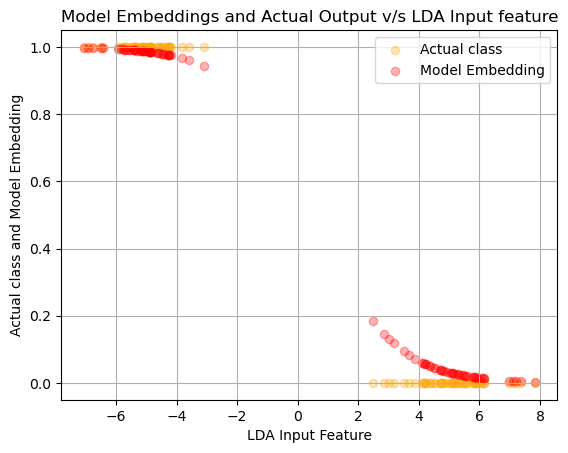

In [16]:
# Vizualizing an comparing both of the results

import matplotlib.pyplot as plt
plt.scatter(X_lda, y, c='orange', alpha=0.3)
plt.scatter(X_lda, A, c='red', alpha=0.3)
plt.legend(["Actual class", "Model Embedding"])
plt.xlabel("LDA Input Feature")
plt.ylabel("Actual class and Model Embedding")
plt.title("Model Embeddings and Actual Output v/s LDA Input feature")
plt.grid()

In [17]:
# Now let us try to visualize it in 3 Dimensions
#Using PCA, a different Dimensionality reduction technique, to reduce the input feature dimensions to 2 from 4.

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [18]:
X_pca

array([[-1.65441341,  0.20660719],
       [-1.63509488, -0.2988347 ],
       [-1.82037547, -0.27141696],
       [-1.66207305, -0.43021683],
       [-1.70358916,  0.21574051],
       [-1.29703913,  0.67110413],
       [-1.76606724, -0.19879839],
       [-1.58304007,  0.05695841],
       [-1.78011362, -0.70206111],
       [-1.59834072, -0.23099112],
       [-1.5040071 ,  0.54413365],
       [-1.56084249, -0.08355705],
       [-1.70082554, -0.36233771],
       [-2.12344152, -0.66329534],
       [-1.68576136,  1.05876217],
       [-1.45785007,  1.26053039],
       [-1.64475545,  0.7077085 ],
       [-1.6210485 ,  0.20442802],
       [-1.21649679,  0.79551434],
       [-1.58454944,  0.41972344],
       [-1.27971892,  0.30138495],
       [-1.53437452,  0.34272876],
       [-2.18076848, -0.01038384],
       [-1.25991144,  0.02298539],
       [-1.30005525, -0.11101033],
       [-1.42887098, -0.25145471],
       [-1.42938118,  0.04344897],
       [-1.53511858,  0.26313827],
       [-1.60523766,

In [19]:
# Splitting dataset for training and testing

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca, y)

In [20]:
# Model Accuracy

model2 = logistic_regg(0.01, 2000)
model2.train(X_train2, y_train2)
y_pred2 = model2.predict(X_test2, 0.5)
score(y_pred2, y_test2)

model got: 25 / 25 correct, which is: 100.0 % accuracy.


In [21]:
# Finding the model embeddings for the input

a = model2.variable()
print(a)
#weights and bias of the model
w = a[:2]
b = a[-1]
print(f'w: {w}, b: {b}')
Z = np.matmul(w, X_pca.T) + b
B = sigmoid(Z)
B.shape

[-2.41933061  0.37669179  0.07503188]
w: [-2.41933061  0.37669179], b: 0.07503187567449232


(100,)

Text(0.5, 0, 'target')

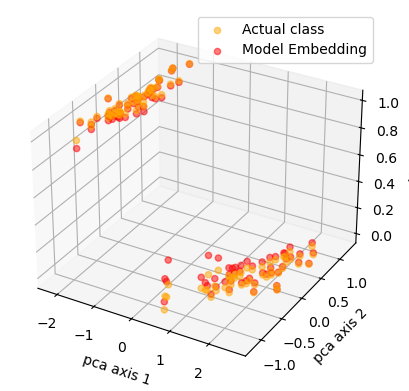

In [22]:
#visualizing the results

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], y, c='orange', alpha=0.5)
ax.scatter(X_pca[:, 0], X_pca[:, 1], A, c='red', alpha=0.5)

ax.set_xlabel('pca axis 1')
ax.set_ylabel('pca axis 2')
plt.legend(["Actual class", "Model Embedding"])
ax.set_zlabel('target')